In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
train_data = pd.read_csv('C:/Users/14359/Desktop/train_data2.csv', encoding='gbk')
train_data.head()

,SWAS_Category,SWAS_Tag,Statement
0,Emotional_Engagement,EE3 Emotional_connection,I care so much about all these characters and ...
1,Emotional_Engagement,EE6 Anger,I was so personally affronted by the actions o...
2,Emotional_Engagement,EE4 Empathy,I was just as furious about these things as if...
3,Emotional_Engagement,EE2 Sympathy,"I wept not for an army, but for a single man."
4,Emotional_Engagement,EE2 Sympathy,I felt SO BAD for Malkom and his tortured past.


In [3]:
trainStatement = train_data['Statement']
trainCategory = train_data['SWAS_Category']

cnt_vectorizer_unigram = CountVectorizer(stop_words='english')
cnt_unigram_train_vector = cnt_vectorizer_unigram.fit_transform(trainStatement)

In [4]:
trainCategory.value_counts()

Emotional_Engagement    278
Other                   160
Mental_Imagery          110
Name: SWAS_Category, dtype: int64

In [5]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(cnt_unigram_train_vector, trainCategory)

DummyClassifier(strategy='most_frequent')

In [6]:
clf = SVC(random_state=42, kernel='linear')

In [7]:
trained_model_unigram = clf.fit(cnt_unigram_train_vector, trainCategory)

In [8]:
# Load a new dataset for evaluation
dev_data = pd.read_csv('C:/Users/14359/Desktop/evaluation_data2.csv', encoding='gbk')
devStatement = dev_data['Statement']
devCategory = dev_data['SWAS_Category']

dev_vector = cnt_vectorizer_unigram.transform(devStatement)

In [9]:
predictedCategory_unigram = trained_model_unigram.predict(dev_vector)

In [10]:
predictedCategory_dummy = dummy_clf.predict(dev_vector)

In [11]:
print("Trained model - UNIGRAM")
print(classification_report(devCategory, predictedCategory_unigram))

Trained model - UNIGRAM
                      precision    recall  f1-score   support

Emotional_Engagement       0.76      0.90      0.82        70
      Mental_Imagery       0.83      0.68      0.75        28
               Other       0.82      0.66      0.73        41

            accuracy                           0.78       139
           macro avg       0.80      0.75      0.77       139
        weighted avg       0.79      0.78      0.78       139



In [12]:
print("Baseline model - MAJORITY")
print(classification_report(devCategory, predictedCategory_dummy))

Baseline model - MAJORITY
                      precision    recall  f1-score   support

Emotional_Engagement       0.50      1.00      0.67        70
      Mental_Imagery       0.00      0.00      0.00        28
               Other       0.00      0.00      0.00        41

            accuracy                           0.50       139
           macro avg       0.17      0.33      0.22       139
        weighted avg       0.25      0.50      0.34       139



C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Add character n-grams (ngram_range=(1, 2))
vectorizer_union = FeatureUnion([('cnt_word', CountVectorizer(stop_words='english')),
                               ('cnt_char', CountVectorizer(analyzer='char', ngram_range=(1, 2)))
                               ])

svm_pipeline = Pipeline([
            ('vectorize', vectorizer_union),
            ('classify', SVC(random_state=42, kernel='linear'))
            ])

trained_model_union = svm_pipeline.fit(trainStatement, trainCategory)
predictedCategory_union = trained_model_union.predict(devStatement)

In [14]:
print("Enhanced model - WORD UNIGRAM + CHAR BI-GRAM")
print(classification_report(devCategory, predictedCategory_union))

Enhanced model - WORD UNIGRAM + CHAR BI-GRAM
                      precision    recall  f1-score   support

Emotional_Engagement       0.81      0.79      0.80        70
      Mental_Imagery       0.47      0.64      0.55        28
               Other       0.79      0.63      0.70        41

            accuracy                           0.71       139
           macro avg       0.69      0.69      0.68       139
        weighted avg       0.74      0.71      0.72       139



In [15]:
# The enhanced model is not as good as the first model, so we still use the first one to test the original dataset
test_data = pd.read_csv('C:/Users/14359/Desktop/test_data.csv', encoding='gbk')

testStatement = test_data['Statement']
true_labels = test_data['Category']
test_vector = cnt_vectorizer_unigram.transform(testStatement)

predictedCategory_test = trained_model_unigram.predict(test_vector)

In [16]:
print("PREDICTION ON TEST")
print(classification_report(true_labels, predictedCategory_test))

PREDICTION ON TEST
                      precision    recall  f1-score   support

Emotional_Engagement       0.91      0.82      0.86        85
      Mental_Imagery       0.50      0.36      0.42        14
               Other       0.00      0.00      0.00         0

            accuracy                           0.76        99
           macro avg       0.47      0.39      0.43        99
        weighted avg       0.85      0.76      0.80        99



C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\14359\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
print(predictedCategory_test)

['Emotional_Engagement' 'Mental_Imagery' 'Mental_Imagery'
 'Emotional_Engagement' 'Other' 'Other' 'Other' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Other' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Mental_Imagery' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_Engagement'
 'Mental_Imagery' 'Emotional_Engagement' 'Emotional_Engagement'
 'Emotional_Engagement' 'Emotional_Engagement' 'Emotional_

In [18]:
print(true_labels)

0     Emotional_Engagement
1     Emotional_Engagement
2     Emotional_Engagement
3     Emotional_Engagement
4     Emotional_Engagement
              ...         
94    Emotional_Engagement
95          Mental_Imagery
96    Emotional_Engagement
97    Emotional_Engagement
98    Emotional_Engagement
Name: Category, Length: 99, dtype: object


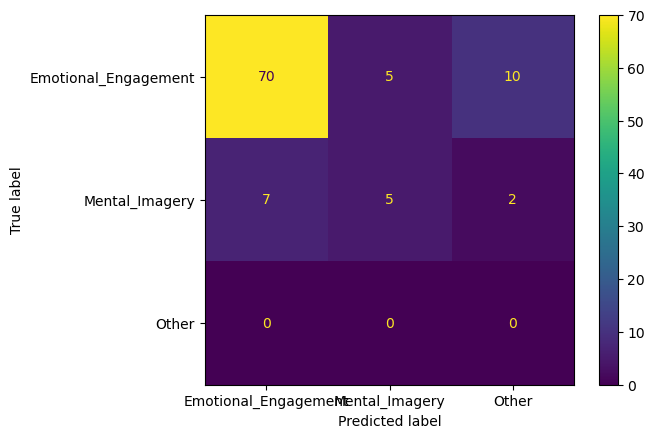

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, predictedCategory_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Emotional_Engagement", "Mental_Imagery",  "Other"])
disp.plot()


In [20]:
# Select statements with wrong labels
test_data['Predicted_Label1']=predictedCategory_test
new_df = test_data[test_data['Category'] != test_data['Predicted_Label1']]
new_df

,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1
1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,P,Excitement,4.0,Mental_Imagery
2,R1,1984,"It looked so radical, a radical society like t...",Emotional_Engagement,n,Connectedness,1.0,Mental_Imagery
4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,N,Fear,5.0,Other
5,R1,1984,The work somehow confirmed that fear that it i...,Emotional_Engagement,N,Fear,5.0,Other
6,R1,1984,that feeling that you are being watched all th...,Emotional_Engagement,N,Horror,5.0,Other
14,R3,In Cold Blood,That was really scary for me to imagine.,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement
15,R3,In Cold Blood,imagining that some kind of evil is created fr...,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement
27,R4,Positive Parenting,"but dissatisfaction, dissatisfaction with some...",Emotional_Engagement,N,Dissatisfaction,2.0,Other
41,R8,Mud,It was really good for me because at the same ...,Emotional_Engagement,P,Connectedness,1.0,Mental_Imagery
48,R79,The Beach,then it was like something like a little Bible...,Emotional_Engagement,n,Inspired,1.0,Mental_Imagery


In [21]:
test_data['Predicted_Label1']=predictedCategory_test
test_data.head()


,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1
0,R1,1984,This one also cut me terribly.,Emotional_Engagement,N,Anger,5.0,Emotional_Engagement
1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,P,Excitement,4.0,Mental_Imagery
2,R1,1984,"It looked so radical, a radical society like t...",Emotional_Engagement,n,Connectedness,1.0,Mental_Imagery
3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,N,Fear,5.0,Emotional_Engagement
4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,N,Fear,5.0,Other


In [22]:
test_data.to_csv('predicted_data1.csv')

In [3]:
predicted_data_new=pd.read_csv('C:/Users/14359/Desktop/predicted_data.csv', encoding='gbk')
wrong_prediction1 = predicted_data_new[predicted_data_new['Category'] != predicted_data_new['Predicted_Label1']]
wrong_prediction1

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
1,1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,P,Excitement,4.0,Mental_Imagery,Mental_Imagery/Emotional_Engagement,Emotional_Engagement
2,2,R1,1984,"It looked so radical, a radical society like t...",Emotional_Engagement,n,Connectedness,1.0,Mental_Imagery,NaN,NaN
4,4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,N,Fear,5.0,Other,Emotional_Engagement,Emotional_Engagement
5,5,R1,1984,The work somehow confirmed that fear that it i...,Emotional_Engagement,N,Fear,5.0,Other,NaN,Emotional_Engagement
6,6,R1,1984,that feeling that you are being watched all th...,Emotional_Engagement,N,Horror,5.0,Other,NaN,NaN
14,14,R3,In Cold Blood,That was really scary for me to imagine.,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Mental_Imagery,NaN
15,15,R3,In Cold Blood,imagining that some kind of evil is created fr...,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Emotional_Engagement,NaN
27,27,R4,Positive Parenting,"but dissatisfaction, dissatisfaction with some...",Emotional_Engagement,N,Dissatisfaction,2.0,Other,NaN,NaN
41,41,R8,Mud,It was really good for me because at the same ...,Emotional_Engagement,P,Connectedness,1.0,Mental_Imagery,NaN,NaN
48,48,R79,The Beach,then it was like something like a little Bible...,Emotional_Engagement,n,Inspired,1.0,Mental_Imagery,NaN,NaN


In [7]:
right_prediction1 = predicted_data_new[predicted_data_new['Category'] == predicted_data_new['Predicted_Label1']]
right_prediction1

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
0,0,R1,1984,This one also cut me terribly.,Emotional_Engagement,N,Anger,5.0,Emotional_Engagement,NaN,Emotional_Engagement
3,3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,N,Fear,5.0,Emotional_Engagement,Mental_Imagery,Emotional_Engagement
7,7,R1,1941: The Year That Keeps Returning?Hardcover,But the very fact that a government 30 days af...,Emotional_Engagement,N,Terror,5.0,Emotional_Engagement,NaN,Emotional_Engagement
8,8,R2,A Hill Above the Clouds,but I know that it was terribly painful.,Emotional_Engagement,N,Pain,3.0,Emotional_Engagement,NaN,NaN
9,9,R2,A Hill Above the Clouds,I don't think I've ever felt so sick.,Emotional_Engagement,N,Disgust,2.0,Emotional_Engagement,NaN,Emotional_Engagement
...,...,...,...,...,...,...,...,...,...,...,...
92,92,R106,The Polyglot Lovers,so that I could visualize it in detail all the...,Mental_Imagery,NaN,NaN,NaN,Mental_Imagery,NaN,NaN
93,93,R106,The Polyglot Lovers,"I can imagine in detail what it is like, what ...",Mental_Imagery,NaN,NaN,NaN,Mental_Imagery,NaN,Mental_Imagery
94,94,R106,Harry Potter,it's actually the first novel I've ever read t...,Emotional_Engagement,N,Fear,5.0,Emotional_Engagement,NaN,NaN
97,97,R106,Harry Potter,I identified myself in Harry Potter when there...,Emotional_Engagement,n,Connectedness,1.0,Emotional_Engagement,Emotional_Engagement,NaN


In [17]:
# gemma_2b_it
wrong_prediction2 = predicted_data_new[(predicted_data_new['Category'] != predicted_data_new['Predicted_Label2_gemma_2b_it'])&(predicted_data_new['Predicted_Label2_gemma_2b_it'].notnull())]
wrong_prediction2

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
1,1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,P,Excitement,4.0,Mental_Imagery,Mental_Imagery/Emotional_Engagement,Emotional_Engagement
3,3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,N,Fear,5.0,Emotional_Engagement,Mental_Imagery,Emotional_Engagement
12,12,R3,In Cold Blood,It was terrible for me.,Emotional_Engagement,N,Horror,5.0,Emotional_Engagement,Mental_Imagery/Emotional_Engagement,Emotional_Engagement
15,15,R3,In Cold Blood,imagining that some kind of evil is created fr...,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Emotional_Engagement,NaN
78,78,R94,In the Shadow of Young Girls in Flower,That was interesting to me.,Emotional_Engagement,P,Interest,2.0,Emotional_Engagement,Mental_Imagery,NaN
91,91,R104,The Hill,I somehow imagined Lastovo in my head.,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Mental_Imagery/Emotional_Engagement,Mental_Imagery


In [8]:
right_prediction2 = predicted_data_new[predicted_data_new['Category'] == predicted_data_new['Predicted_Label2_gemma_2b_it']]
right_prediction2

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
4,4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,N,Fear,5.0,Other,Emotional_Engagement,Emotional_Engagement
13,13,R3,In Cold Blood,That was really scary for me to imagine.,Emotional_Engagement,N,Horror,5.0,Emotional_Engagement,Emotional_Engagement,Emotional_Engagement
14,14,R3,In Cold Blood,That was really scary for me to imagine.,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Mental_Imagery,NaN
62,62,R90,novels about Harry Hole,Imagination was running wild.,Mental_Imagery,NaN,NaN,NaN,Emotional_Engagement,Mental_Imagery,NaN
70,70,R91,all books,I felt extreme sadness with some of them.,Emotional_Engagement,N,Sadness,2.0,Emotional_Engagement,Emotional_Engagement,NaN
71,71,R92,In Desert and Wilderness,It was quite interesting for a young person.,Emotional_Engagement,P,Interest,2.0,Emotional_Engagement,Emotional_Engagement,NaN
88,88,R104,The Restless,I felt the most sorry for her,Emotional_Engagement,N,Empathy,1.0,Emotional_Engagement,Emotional_Engagement,Mental_Imagery
97,97,R106,Harry Potter,I identified myself in Harry Potter when there...,Emotional_Engagement,n,Connectedness,1.0,Emotional_Engagement,Emotional_Engagement,NaN


In [18]:
# gemma_7b_it
wrong_prediction3 = predicted_data_new[(predicted_data_new['Category'] != predicted_data_new['Predicted_Label2_gemma_7b_it'])&(predicted_data_new['Predicted_Label2_gemma_7b_it'].notnull())]

wrong_prediction3

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
52,52,R79,Trouble at Timpetill,"it was as if it was tense, that there was some...",Emotional_Engagement,n,Tension,5.0,Emotional_Engagement,NaN,Mental_Imagery
53,53,R79,Death and the Dervish,I think there was some peace,Emotional_Engagement,n,Peacefulness,1.0,Emotional_Engagement,NaN,Mental_Imagery
88,88,R104,The Restless,I felt the most sorry for her,Emotional_Engagement,N,Empathy,1.0,Emotional_Engagement,Emotional_Engagement,Mental_Imagery


In [10]:
right_prediction3 = predicted_data_new[predicted_data_new['Category'] == predicted_data_new['Predicted_Label2_gemma_7b_it']]
right_prediction3

,Unnamed: 0,File_Name,Book,Statement,Category,Emotion_Type,Emotion,Arousal,Predicted_Label1,Predicted_Label2_gemma_2b_it,Predicted_Label2_gemma_7b_it
0,0,R1,1984,This one also cut me terribly.,Emotional_Engagement,N,Anger,5.0,Emotional_Engagement,NaN,Emotional_Engagement
1,1,R1,1984,"It's unbelievable to me that he's like this, I...",Emotional_Engagement,P,Excitement,4.0,Mental_Imagery,Mental_Imagery/Emotional_Engagement,Emotional_Engagement
3,3,R1,1984,I think it somehow confirmed that certain emot...,Emotional_Engagement,N,Fear,5.0,Emotional_Engagement,Mental_Imagery,Emotional_Engagement
4,4,R1,1984,I had this biggest fear and was afraid of that...,Emotional_Engagement,N,Fear,5.0,Other,Emotional_Engagement,Emotional_Engagement
5,5,R1,1984,The work somehow confirmed that fear that it i...,Emotional_Engagement,N,Fear,5.0,Other,NaN,Emotional_Engagement
7,7,R1,1941: The Year That Keeps Returning?Hardcover,But the very fact that a government 30 days af...,Emotional_Engagement,N,Terror,5.0,Emotional_Engagement,NaN,Emotional_Engagement
9,9,R2,A Hill Above the Clouds,I don't think I've ever felt so sick.,Emotional_Engagement,N,Disgust,2.0,Emotional_Engagement,NaN,Emotional_Engagement
10,10,R2,A Hill Above the Clouds,I know that this description of that situation...,Emotional_Engagement,N,Pain,3.0,Emotional_Engagement,NaN,Emotional_Engagement
12,12,R3,In Cold Blood,It was terrible for me.,Emotional_Engagement,N,Horror,5.0,Emotional_Engagement,Mental_Imagery/Emotional_Engagement,Emotional_Engagement
13,13,R3,In Cold Blood,That was really scary for me to imagine.,Emotional_Engagement,N,Horror,5.0,Emotional_Engagement,Emotional_Engagement,Emotional_Engagement
